# Additional simulation-related code

See [this post](https://yanirseroussi.com/2020/08/24/many-is-not-enough-counting-simulations-to-bootstrap-the-right-way/) for details.

In [1]:
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn-colorblind')
pylab.rcParams['figure.figsize'] = (15, 5)
pylab.rcParams['figure.facecolor'] = 'w'

## Recover the data from the original notebook

In [3]:
sample_size_100_df = pd.DataFrame(dict(
    percentile={100: 0.843, 1000: 0.875, 10000: 0.878},
    bca={100: 0.839, 1000: 0.874, 10000: 0.878},
    studentized_10={100: 0.919, 1000: 0.942, 10000: 0.94},
))
sample_size_100_df

,percentile,bca,studentized_10
100,0.843,0.839,0.919
1000,0.875,0.874,0.942
10000,0.878,0.878,0.940


In [4]:
sample_size_1000_df = pd.DataFrame(dict(
    percentile={100: 0.854, 1000: 0.876, 10000: 0.883},
    bca={100: 0.847, 1000: 0.875, 10000: 0.881},
    studentized_10={100: 0.916, 1000: 0.93, 10000: 0.931},
))
sample_size_1000_df

,percentile,bca,studentized_10
100,0.854,0.847,0.916
1000,0.876,0.875,0.930
10000,0.883,0.881,0.931


In [5]:
sample_size_10000_df = pd.DataFrame(dict(
    percentile={100: 0.865, 1000: 0.88, 10000: 0.885},
    bca={100: 0.855, 1000: 0.881, 10000: 0.885},
    studentized_10={100: 0.916, 1000: 0.941, 10000: 0.941},
))
sample_size_10000_df

,percentile,bca,studentized_10
100,0.865,0.855,0.916
1000,0.880,0.881,0.941
10000,0.885,0.885,0.941


## Derive CI bounds

In [6]:
def get_observed_ci_bounds(all_num_simulations=(10, 100, 500, 1000, 2000, 5000, 10000),
                           ci_level=0.95,
                           simulation_confidence=0.99):
    return pd.DataFrame(
        index=pd.Series(all_num_simulations, name='num_simulations'),
        data=[
            np.array(
                scipy.stats.binom.interval(simulation_confidence, n=num_simulations, p=ci_level)
            ) / num_simulations
            for num_simulations in all_num_simulations
        ],
        columns=['low', 'high']
    ) * 100

ci_bounds = get_observed_ci_bounds()
ci_bounds

,low,high
num_simulations,,
10,70.00,100.00
100,89.00,100.00
500,92.40,97.40
1000,93.10,96.70
2000,93.70,96.20
5000,94.18,95.78
10000,94.43,95.55


Text(0.5, 1.0, 'Observed CI bounds (ci_level=95%, simulation_confidence=99%)')

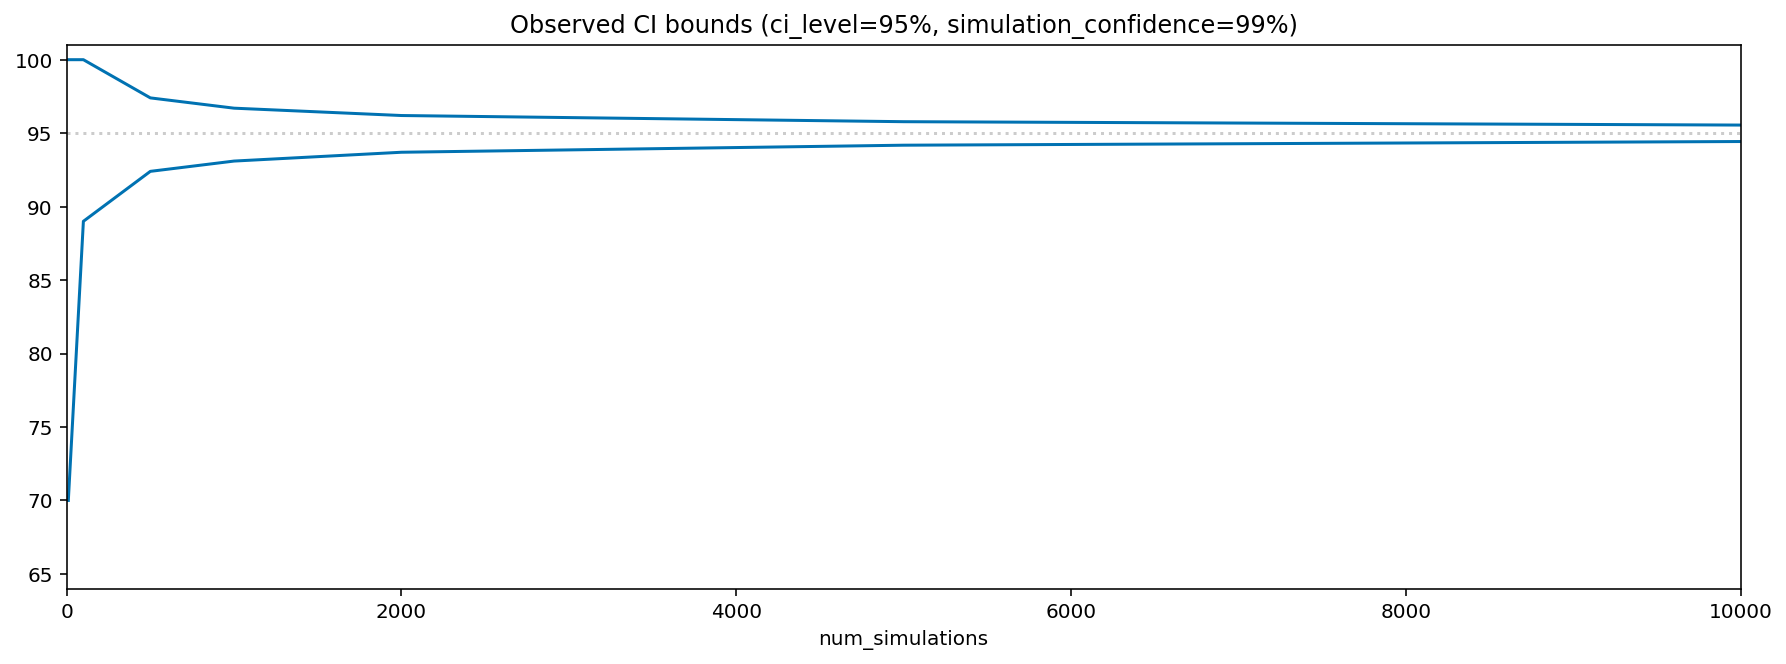

In [7]:
ax = ci_bounds.plot()
ax.set_xlim(0, 10000)
ax.set_ylim(64, 101)
ax.get_lines()[1].set_color('#0072B2')
ax.axhline(95, color='0.8', linestyle=':')
ax.legend().remove()
ax.set_title('Observed CI bounds (ci_level=95%, simulation_confidence=99%)')

## Generate a new plot with bounds for 1,000 simulations

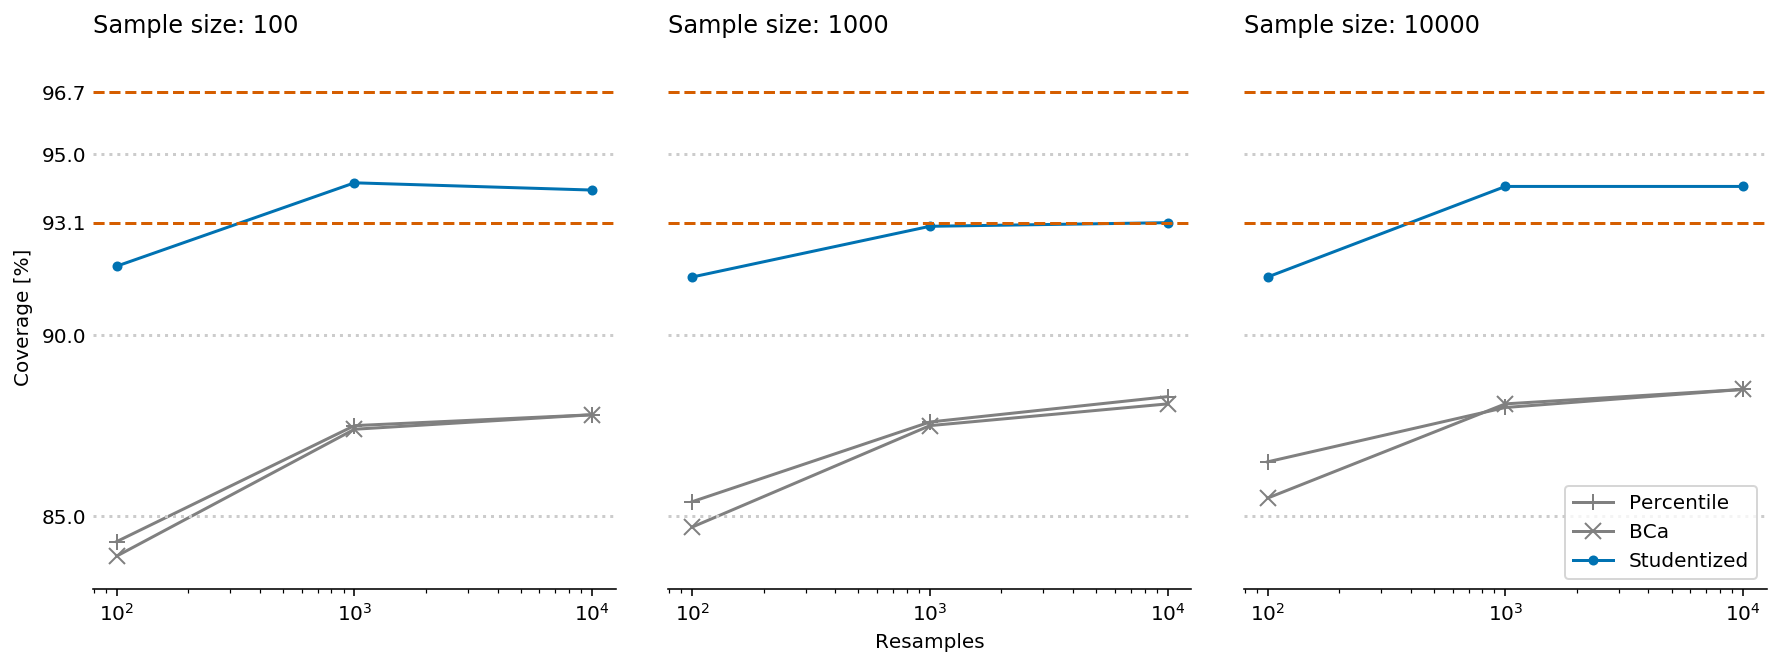

In [8]:
fig, (ax100, ax1000, ax10000) = plt.subplots(ncols=3, sharey=True)
fig.subplots_adjust(wspace=0.1)
for ax, df in zip((ax100, ax1000, ax10000), (sample_size_100_df, sample_size_1000_df, sample_size_10000_df)):
    df = df * 100
    df.columns = ['Percentile', 'BCa', 'Studentized']
    df.plot(style=['+-','x-','.-'], ms=8, logx=True, ax=ax)
    ax.axhline(96.7, color='#D55E00', linestyle='--')
    ax.axhline(93.1, color='#D55E00', linestyle='--')
    ax.axhline(95, color='0.8', linestyle=':')
    ax.axhline(90, color='0.8', linestyle=':')
    ax.axhline(85, color='0.8', linestyle=':')
    ax.set_ylabel('Coverage [%]')
    ax.set_ylim(83, 98)
    ax.set_yticks([85, 90, 93.1, 95, 96.7])
    ax.legend().remove()
    ax.tick_params(axis='y', which='both', length=0)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_lines()[0].set_color('0.5')
    ax.get_lines()[1].set_color('0.5')
    ax.get_lines()[2].set_color('#0072B2')
ax100.set_title('Sample size: 100', loc='left')
ax1000.set_title('Sample size: 1000', loc='left')
ax10000.set_title('Sample size: 10000', loc='left')
ax1000.set_xlabel('Resamples')
ax10000.legend(loc='lower right')